In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing 
import seaborn as sns

In [16]:
dataset = datasets.load_breast_cancer()

In [17]:
df1 = pd.DataFrame(dataset.data)
df1.columns = dataset.feature_names
df2 = pd.DataFrame(dataset.target)
df1['target'] = df2
df = df1.copy()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [18]:
# sns.pairplot(df)

<AxesSubplot:>

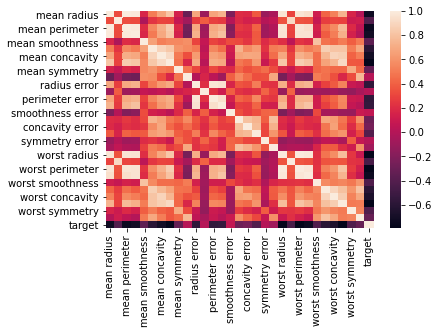

In [19]:
sns.heatmap(df.corr())

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 0)

# Feature Scaling before applying KNN

In [21]:
min_max_scaler_object = preprocessing.MinMaxScaler()
X_train = min_max_scaler_object.fit_transform(X_train)
X_test = min_max_scaler_object.transform(X_test)

# Cross Validation to find which value of k suits our data

In [22]:
x_axis = []
y_axis = []
for k in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, X_train, Y_train, cv = KFold(n_splits=5, shuffle=True, random_state=0))
    x_axis.append(k)
    y_axis.append(score.mean())

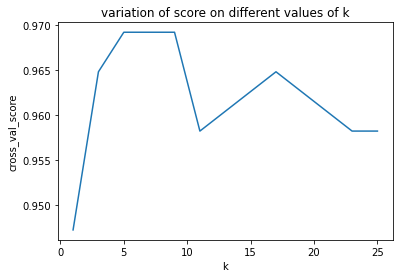

In [23]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.xlabel("k")
plt.ylabel("cross_val_score")
plt.title("variation of score on different values of k")
plt.show()

#### Through above graph we can see that for k=5 it is giving better score so we will choose k=5

# Implementing sklearn in-built KNeighboursClassifier 

In [24]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2, metric='minkowski')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.956140350877193

# Implementing KNN from scratch

In [25]:
from sklearn.metrics import accuracy_score
from collections import Counter

In [26]:
def train(x, y):
    return

def predict_one(x_train, y_train, x_test, k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i, :] - x_test)**2).sum()
        distances.append([distance, i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0]

def predict(x_train, y_train, x_test_data, k):
    predictions = []
    for x_test in x_test_data:
        predictions.append(predict_one(x_train, y_train, x_test, k))
    return predictions

In [27]:
y_pred = predict(X_train, Y_train, X_test, 5)
accuracy_score(Y_test, y_pred)

0.956140350877193

In [28]:
a = [1,0,1,1,1,1,0, 2]
Counter(a).most_common(1)[0][0]

1